# Using Pandas to Read Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({
    "font.size": 14,
    "font.family": "serif", 
    "mathtext.fontset": "cm"})

## Import Sample Data

In [2]:
data = pd.read_csv('../data/sample_data.csv')

In [3]:
data.head()

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   column_a  5 non-null      int64
 1   column_b  5 non-null      int64
 2   column_c  5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


## Plot Data Using Matplotlib

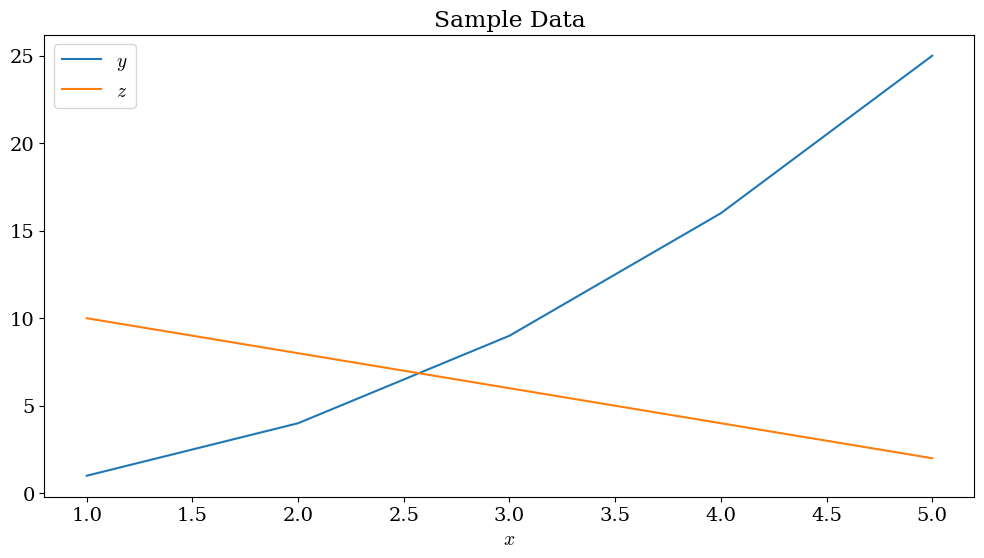

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data.column_a, data.column_b, label=r'$y$')
plt.plot(data.column_a, data.column_c, label=r'$z$')
plt.legend()
plt.title(r'Sample Data')
plt.xlabel(r'$x$')
plt.show();

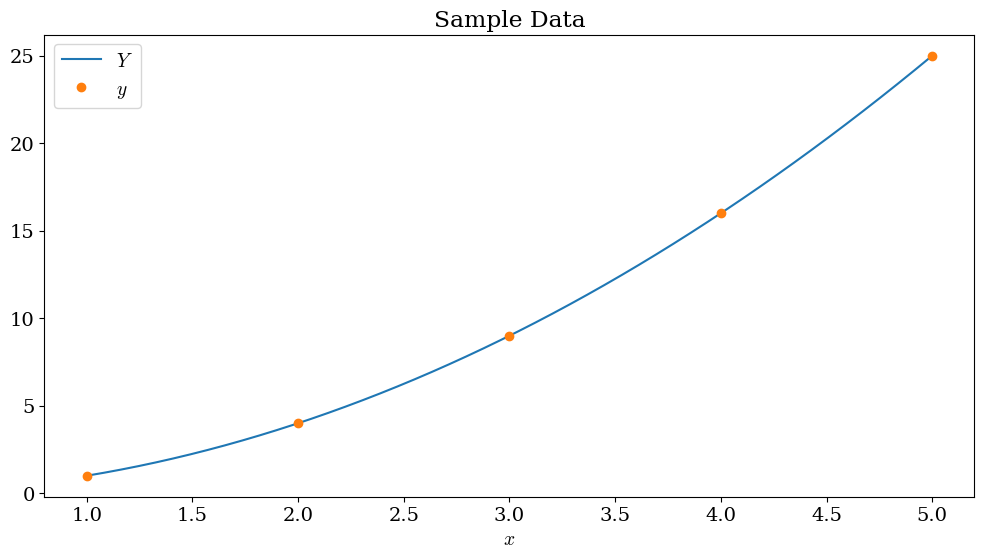

In [6]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(1,5), np.linspace(1,5)**2, label=r'$Y$')
plt.plot(data.column_a, data.column_b, 'o', label=r'$y$')
plt.legend()
plt.title(r'Sample Data')
plt.xlabel(r'$x$')
plt.show()

## Slicing and Dicing

In [7]:
population = pd.read_csv('../data/countries.csv')
population.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [9]:
indian = population[population.country == 'India']
chinese = population[population.country == 'China']

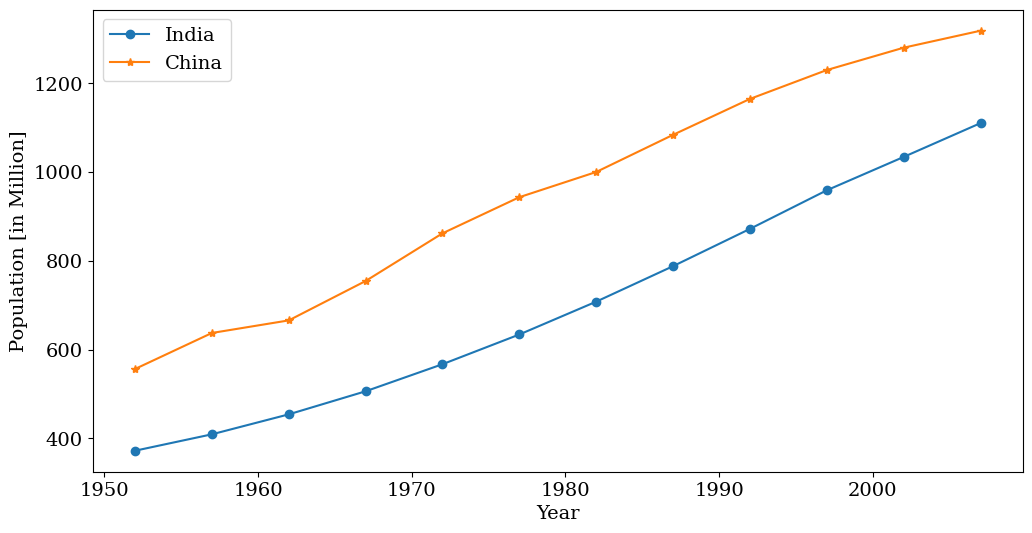

In [10]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / 10**6, '-o', label=r'India')
plt.plot(chinese.year, chinese.population / 10**6, '-*', label=r'China')
plt.legend()
plt.ylabel(r'Population [in Million]')
plt.xlabel(r'Year')
plt.show()

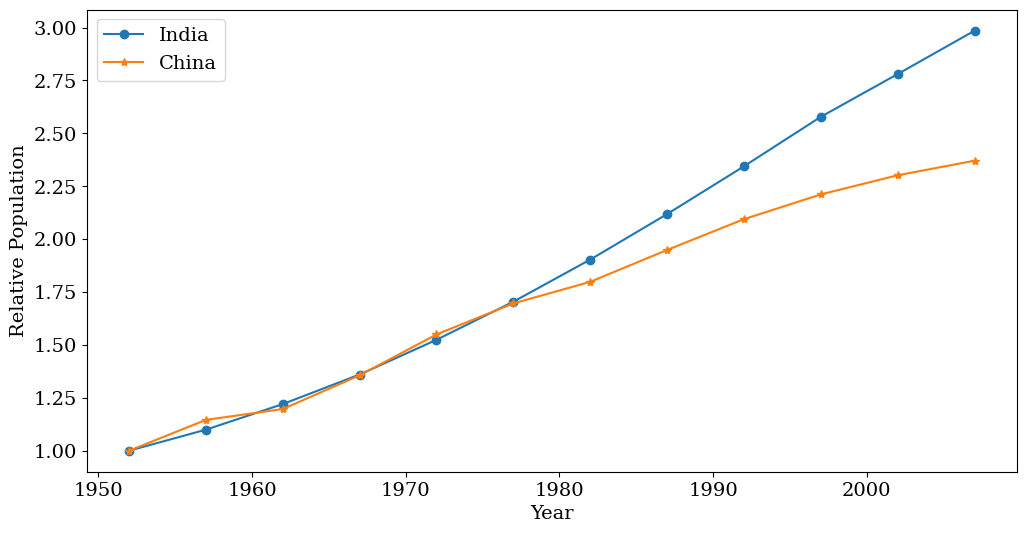

In [11]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / indian.population.iloc[0], '-o', label=r'India')
plt.plot(chinese.year, chinese.population / chinese.population.iloc[0], '-*', label=r'China')
plt.legend()
plt.ylabel(r'Relative Population')
plt.xlabel(r'Year')
plt.show()

**Checkpoint:** Can you make any inferences from this plot?

In [12]:
start = population[(population.year == 1952) & (population.population > 3e7)]
# start = population[(population.year == 1952) & (population.population > 3e7)].sort_values(by=['population'],ascending=False)
# start = population[(population.year == 1952) & (population.population > 3e7)].sort_values(by=['population'],ascending=False).iloc[:10]

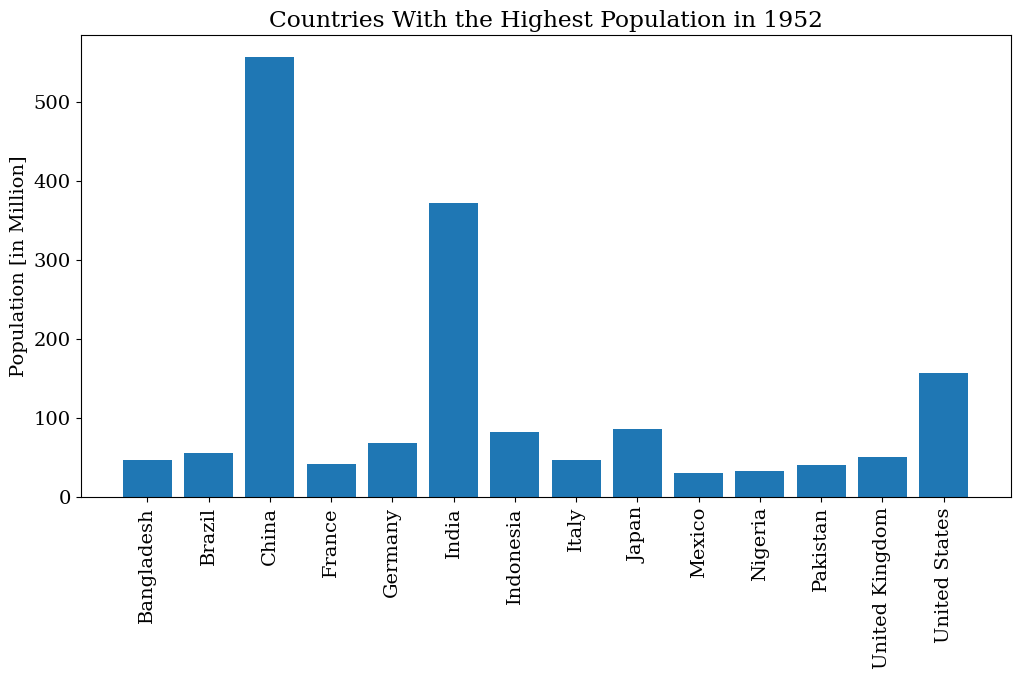

In [13]:
plt.figure(figsize=(12,6))
plt.bar(start.country, start.population / 1e6)
plt.title(r'Countries With the Highest Population in 1952')
plt.ylabel(r'Population [in Million]')
plt.xticks(rotation = 90);

In [14]:
end = population[(population.year == 2007) & (population.population > 3e7)]
# end = population[(population.year == 2007) & (population.population > 3e7)].sort_values(by=['population'],ascending=False)
# end = population[(population.year == 2007) & (population.population > 3e7)].sort_values(by=['population'],ascending=False).iloc[:10]

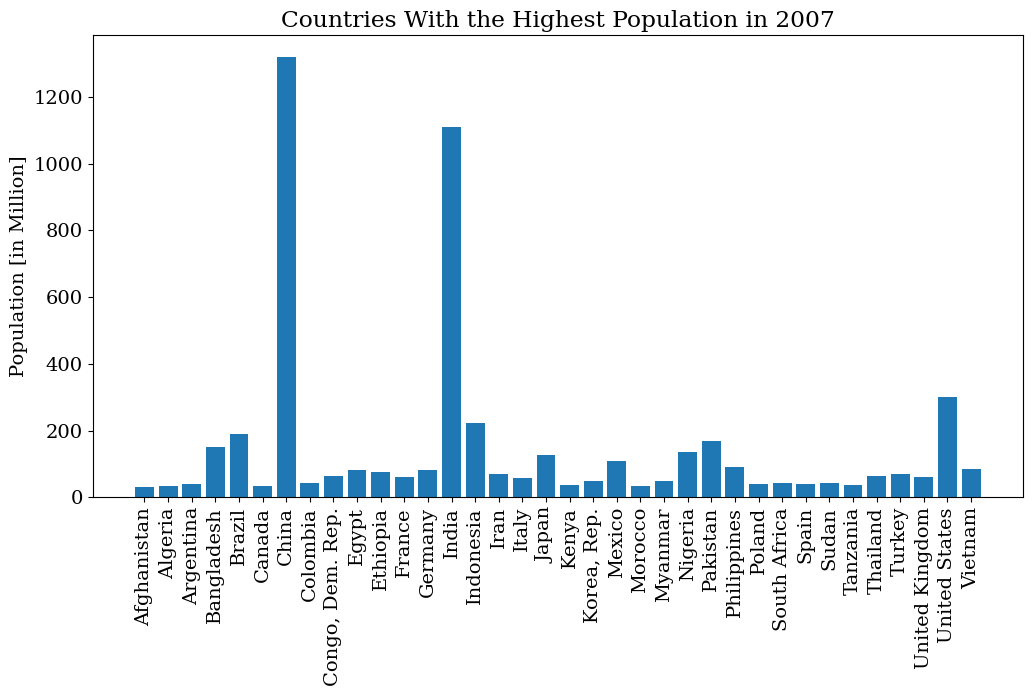

In [15]:
plt.figure(figsize=(12,6))
plt.bar(end.country, end.population / 1e6)
plt.title(r'Countries With the Highest Population in 2007')
plt.ylabel(r'Population [in Million]')
plt.xticks(rotation = 90);

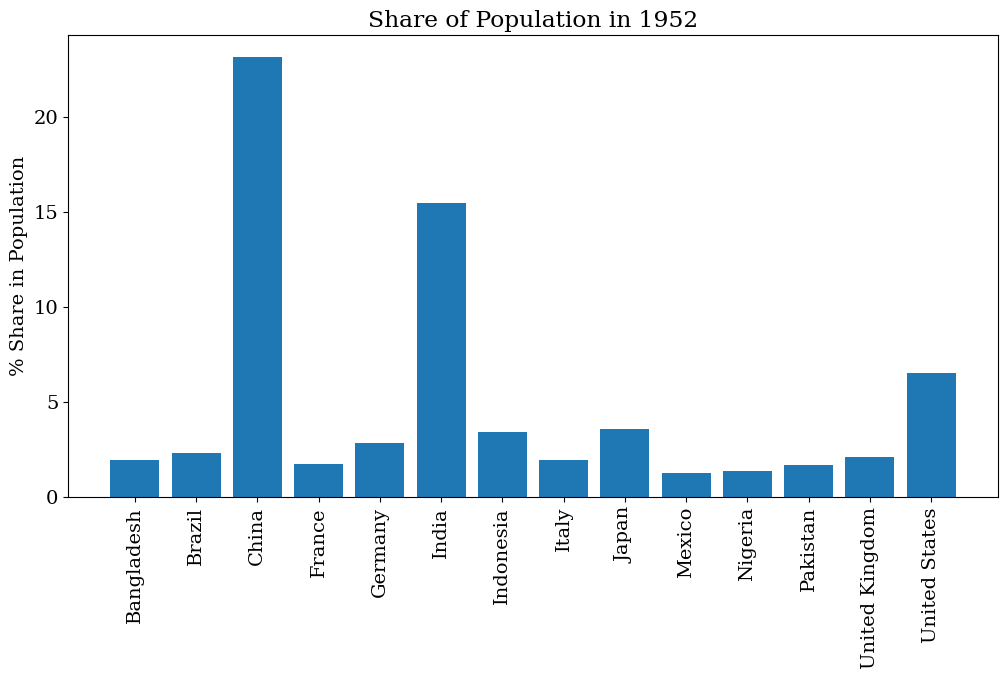

In [16]:
plt.figure(figsize=(12,6))
plt.bar(start.country, start.population / population[population.year==1952].population.sum() * 100)
plt.title(r'Share of Population in 1952')
plt.ylabel(r'% Share in Population')
plt.xticks(rotation = 90);

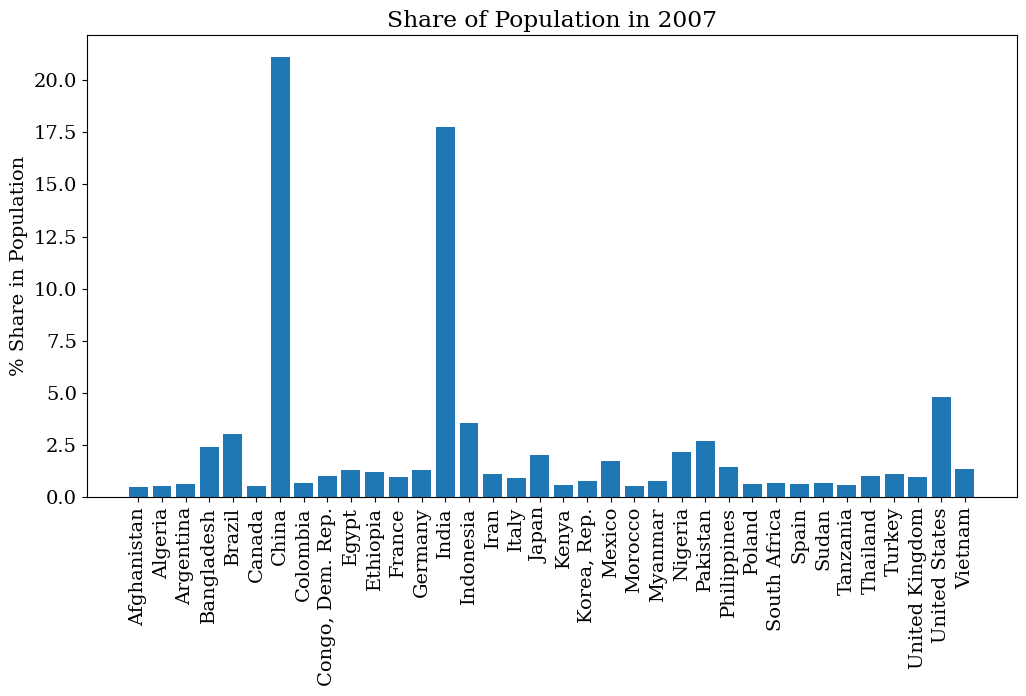

In [17]:
plt.figure(figsize=(12,6))
plt.bar(end.country, end.population / population[population.year==2007].population.sum() * 100)
plt.title(r'Share of Population in 2007')
plt.ylabel(r'% Share in Population')
plt.xticks(rotation = 90);